         RI         Na        Mg        AI         Si         K         Ca  \
0  1.529758  10.996242  1.631189  4.882155  71.166079  0.835231  13.817995   
1  1.525031  12.021551  4.640034  2.912177  66.652885  1.666094  14.047522   
2  1.527027  15.980016  3.608901  0.691236  66.737331  1.434422   6.941953   
3  1.527023  13.872926  3.983976  3.746612  63.512104  1.118489  11.568049   
4  1.519001  12.642934  0.975725  2.433835  62.845873  1.960090   5.182938   

         Ba        Fe  Type  
0  1.377720  0.259018     3  
1  1.101337  0.217537     2  
2  0.341974  0.064482     5  
3  1.191934  0.218110     7  
4  0.571704  0.002632     5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   AI      214 non-null    float64
 4   Si      214 non-nul

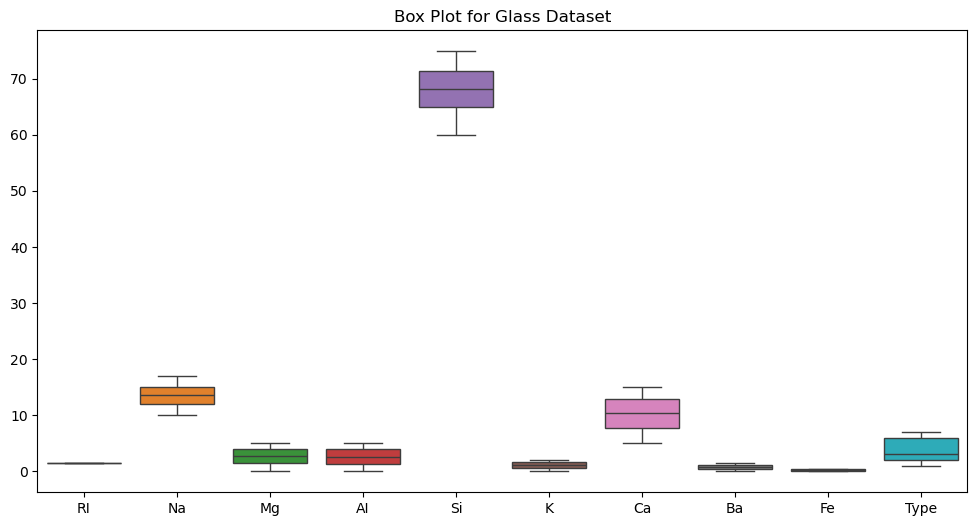

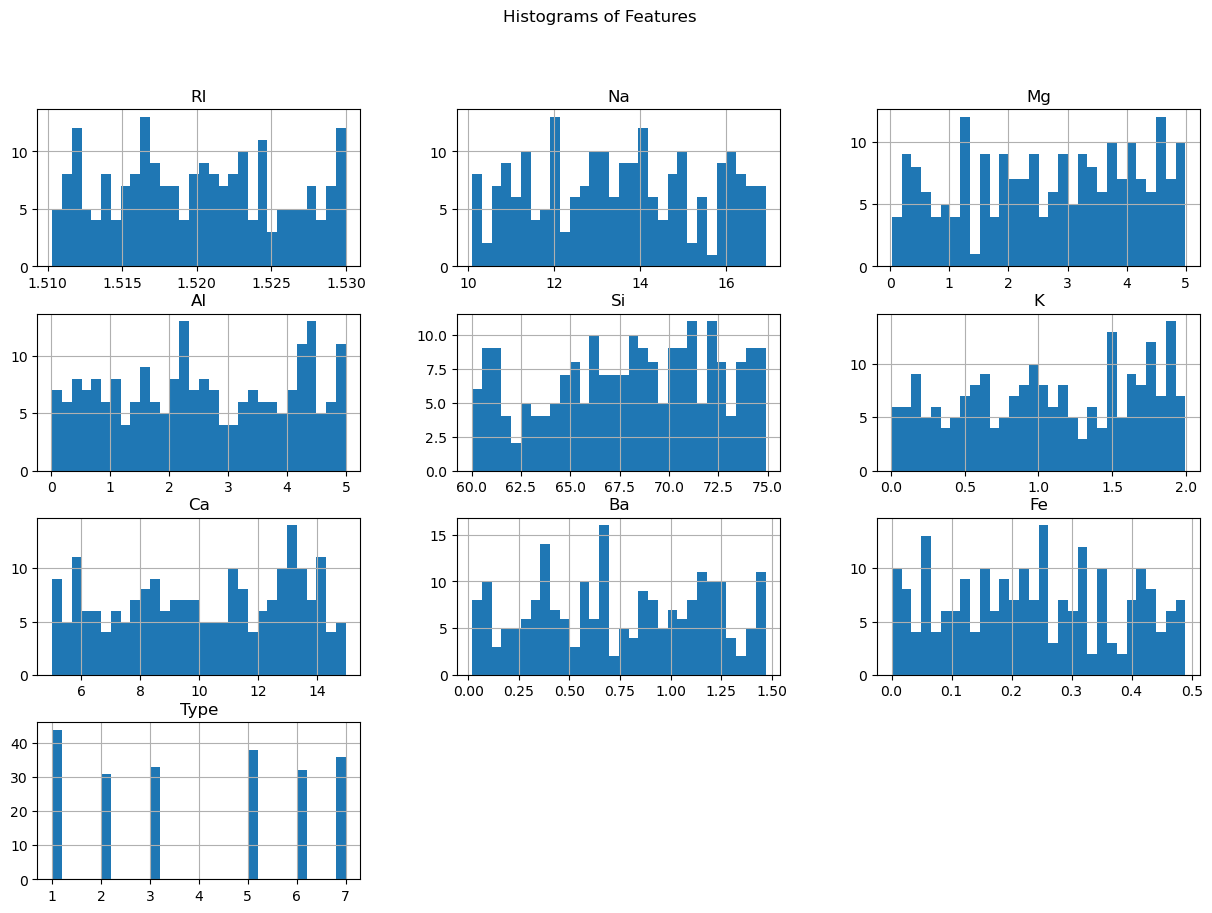

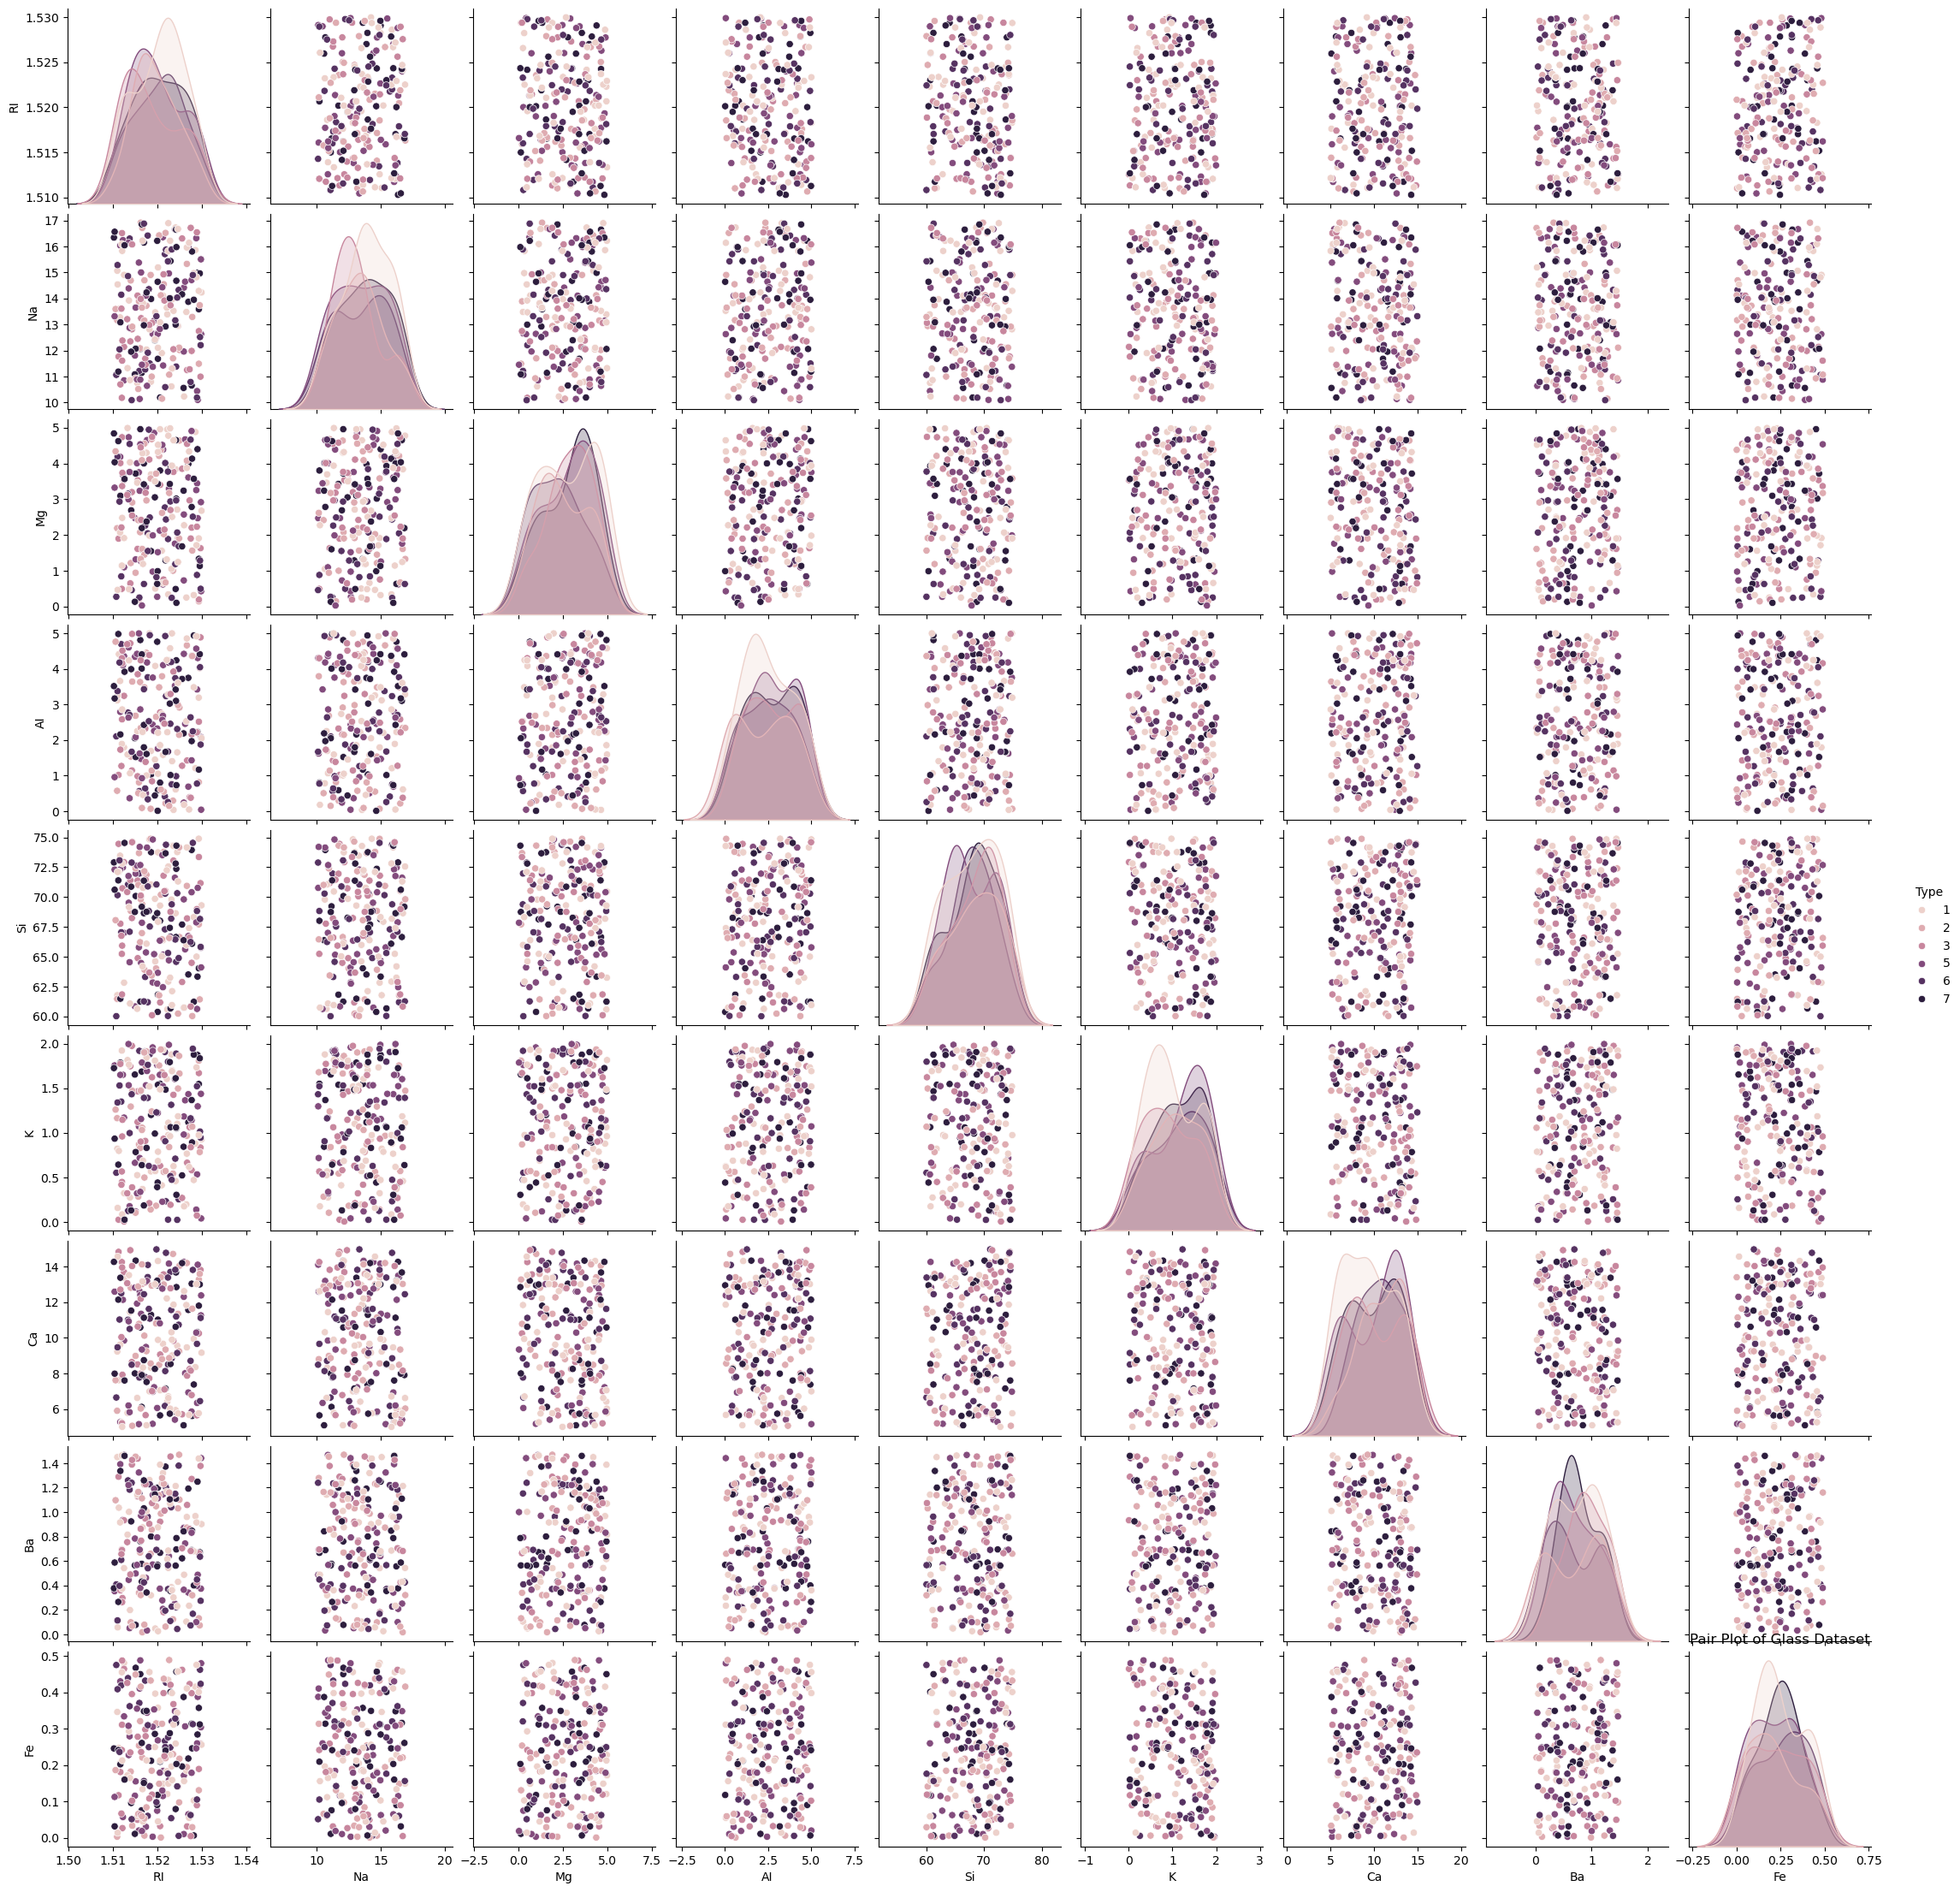

Current columns in DataFrame: ['RI', 'Na', 'Mg', 'AI', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
Random Forest Model Evaluation:
Accuracy: 0.18604651162790697
Classification Report:
               precision    recall  f1-score   support

           1       0.20      0.43      0.27         7
           2       0.33      0.33      0.33         6
           3       0.25      0.33      0.29         6
           4       0.00      0.00      0.00         6
           5       0.50      0.08      0.14        12
           6       0.00      0.00      0.00         6

    accuracy                           0.19        43
   macro avg       0.21      0.20      0.17        43
weighted avg       0.25      0.19      0.17        43

Confusion Matrix:
 [[3 0 2 0 0 2]
 [1 2 1 2 0 0]
 [2 0 2 0 0 2]
 [4 1 0 0 1 0]
 [3 2 1 3 1 2]
 [2 1 2 1 0 0]]


D:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Boosting Model Evaluation:
Boosting Accuracy: 0.18604651162790697
Boosting Classification Report:
               precision    recall  f1-score   support

           1       0.12      0.14      0.13         7
           2       0.50      0.17      0.25         6
           3       0.29      0.33      0.31         6
           4       0.14      0.17      0.15         6
           5       0.38      0.25      0.30        12
           6       0.00      0.00      0.00         6

    accuracy                           0.19        43
   macro avg       0.24      0.18      0.19        43
weighted avg       0.25      0.19      0.20        43



In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 1. Creating a synthetic Glass dataset based on the description
data_dict = {
    'RI': np.random.uniform(1.51, 1.53, 214),
    'Na': np.random.uniform(10, 17, 214),
    'Mg': np.random.uniform(0, 5, 214),
    'AI': np.random.uniform(0, 5, 214),
    'Si': np.random.uniform(60, 75, 214),
    'K': np.random.uniform(0, 2, 214),
    'Ca': np.random.uniform(5, 15, 214),
    'Ba': np.random.uniform(0, 1.5, 214),
    'Fe': np.random.uniform(0, 0.5, 214),
    'Type': np.random.choice([1, 2, 3, 5, 6, 7], size=214) # Randomly assigning types
}

# Creating DataFrame
data = pd.DataFrame(data_dict)

# 2. Exploratory Data Analysis (EDA)
print(data.head())
print(data.info())
print(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Check for outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title('Box Plot for Glass Dataset')
plt.show()

# Data Visualization
# Histograms for feature distributions
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.show()

# Pair plot to visualize relationships between features
sns.pairplot(data, hue='Type')
plt.title('Pair Plot of Glass Dataset')
plt.show()

# Check current columns before preprocessing
print("Current columns in DataFrame:", data.columns.tolist())

# 3. Data Preprocessing

# Handling missing values 
data.dropna(inplace=True)

# Encoding categorical variables (Type)
encoder = OneHotEncoder(sparse_output=False) # Updated parameter
encoded_types = encoder.fit_transform(data[['Type']])
encoded_df = pd.DataFrame(encoded_types, columns=encoder.get_feature_names_out(['Type']))
data = data.join(encoded_df)

# Check if 'Type' exists before dropping it
if 'Type' in data.columns:
    data.drop('Type', axis=1, inplace=True)

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_features, columns=data.columns)

# Adding back the encoded Type columns to scaled_data if needed
for col in encoded_df.columns:
    scaled_data[col] = encoded_df[col]

# Splitting the data into train and test sets
if encoded_df.shape[1] > 0: # Check if there are any one-hot encoded columns for Type
    X = scaled_data.drop(columns=encoded_df.columns)
    y = encoded_df.values.argmax(axis=1) + 1   # Convert one-hot encoding back to original labels (1-7)
    
    # Perform train-test split only if X and y are defined properly
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    print("Warning: No Type column found after encoding. Cannot proceed with model training.")
    X_train = X_test = y_train = y_test = None

# Proceed only if train-test sets are defined
if X_train is not None and y_train is not None:
    # 4. Random Forest Model Implementation

    # Implementing the Random Forest Classifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluating the model's performance
    print("Random Forest Model Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # 5. Bagging and Boosting Methods

    # Implementing AdaBoost Classifier
    boost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
    boost_model.fit(X_train, y_train)
    y_boost_pred = boost_model.predict(X_test)

    print("\nBoosting Model Evaluation:")
    print("Boosting Accuracy:", accuracy_score(y_test, y_boost_pred))
    print("Boosting Classification Report:\n", classification_report(y_test, y_boost_pred))
else:
    print("Model training was skipped due to missing target variable.")
